# **99 Little Orange, Technical Business Case**

This is a simulation of real-case scenario from [Kaggle](https://www.kaggle.com/datasets/ivanchvez/99littleorange) to practice and  learn. It is organized  in 2 parts:

     1. A technical part of close-ended questions with specific answers.

In technical provide both the answer and the SQL code user for the following questions: What is the average trip cost of holidays? How does it compare to non-holidays?  Find the average number of trips per driver for every week day. Which day of the week drivers usually drive the most distance on average? What was the growth percentage of rides month over month? List top 5 drivers per number of trips in top 5 cities.

    2. An analytical part of open-ended question in order to build data-backed recommendations to support decision-making.

  

99 Little Orange is a marketplace, where drivers are the supply and passengers, the demand. One of our main challenges is to keep this marketplace balanced. If there is too much demand, prices would increase due to surge and passengers would prefer not to run. If there is too much supply, drivers would spend more time idle impacting their revenue. Let's say today is 2019-09-23 and a new Operations manager was just hired. She has 5 min during Ops weekly meeting to present an overview of the business in the city, and since she's just arrived, she asked tou to help to do it. What would you prepare for this 5 min presentation? Please provide 1-2 slides with your idea.

She also mentioned she has a budget to invest in promoting the business. What kind of metrics and performance indicators would you use in order to help her decide if she should invest it into the passenger side or driver side?

This analysis was created in Azure Data Studio, and visualizations in publicTableau website.

Database contains 4 tables: Calendar, City, Passenger, Trip. At first, let's load and preview first 5 lines in each tables.

In [3]:
SELECT TOP 5 * --where id Identification number of calendar date, holiday - Binary flag to indicate if the calendar date is holiday(1) or non-holiday(0)
FROM dbo. Calendar

(5 rows affected)

Total execution time: 00:00:00.022

id,calendar_date,week_day,holiday
46724,2018-01-01,Monday,1
46725,2018-01-02,Tuesday,0
46726,2018-01-03,Wednesday,0
46727,2018-01-04,Thursday,0
46728,2018-01-05,Friday,0


In [4]:
SELECT TOP 5 * -- where id - Unique identifier of city, name - City name
FROM dbo. city

(5 rows affected)

Total execution time: 00:00:00.009

id,name
42868,Mordor
42948,Erebor
43006,Minas Tirith
43020,Isengard
43050,Gondor


In [1]:
SELECT TOP 5 * -- where id - Identification of passenger, first_call_time - Date and time of the first call of a passenger
FROM dbo.passenger

(5 rows affected)

Total execution time: 00:00:00.103

id,first_call_time
00000fab,2019-05-11 20:23:54.0000000
0000149d,2018-12-24 21:21:33.0000000
00002b66,2018-09-20 21:08:24.0000000
00002bc7,2019-07-28 11:27:56.0000000
0000332e,2019-02-21 23:34:24.0000000


In [3]:
SELECT TOP 10 *
FROM dbo.trip -- where id - Identification of trip, driver_id - Identification of driver, passenger_id - Identification of passenger, city_id - 
            -- Identification of city, call_time - Datetime in which the trips was called by the passenger, finish_time - Datetime in which the trip was
            -- finished, surge_rate - Additional multiplier of base fare, 0 means no additiona charge, 0.3 means 1.3x.

(10 rows affected)

Total execution time: 00:00:00.054

id,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare
a84c0db2,cb64172e,2ea4359d,43006,2019-09-08 22:01:28.0000000,2019-09-08 22:15:54.0000000,0.30000001192092896,1.9199999570846558,4.360000133514404
a84c2d10,3034e6fe,e1bd0c8d,43006,2019-07-01 20:56:28.0000000,2019-07-01 21:22:09.0000000,0,9.359999656677246,6.909999847412109
a84c3e75,93fb6802,75e6d450,43050,2019-08-20 21:30:46.0000000,2019-08-20 21:46:48.0000000,0,4.389999866485596,3.4800000190734863
a84c3f6f,25fc9273,5ba48e89,43020,2019-09-08 02:42:41.0000000,2019-09-08 02:59:56.0000000,0,2.0399999618530273,1.5399999618530273
a84c5ce2,484c4d0c,fdb2ef59,43006,2019-06-10 09:29:18.0000000,2019-06-10 09:55:36.0000000,0,7.369999885559082,5.829999923706055
a84c7980,4ae02c4b,f9cbc467,43179,2019-08-26 10:20:32.0000000,2019-08-26 10:33:36.0000000,0,2.140000104904175,3.309999942779541
a84ca16d,c4b85240,8030fcc0,43050,2019-06-21 20:27:10.0000000,2019-06-21 20:37:05.0000000,0,2.049999952316284,1.2799999713897705
a84cc24a,0fe2603a,32f96337,43278,2019-08-03 09:30:58.0000000,2019-08-03 09:55:58.0000000,0,6.889999866485596,5.550000190734863
a84cd4a7,fdb18901,93be5cbe,43116,2019-05-18 18:39:19.0000000,2019-05-18 19:12:48.0000000,0,9.050000190734863,4
a84cd524,a9788733,08ca0600,43179,2019-07-14 06:13:04.0000000,2019-07-14 06:47:53.0000000,0,11.729999542236328,9.470000267028809


## **PART 1.   Technical**

## <span style="font-size: 14px;">Now, let's get answer on the next questions:</span>

1. What is the average trip cost of holidays?
2. How does it compare to non-holidays?
3. Find the average number of trips per driver for every week day.
4. Which day of the week drivers usually drive the most distance on average?
5. What was the growth percentage of rides month over month?
6. List top 5 drivers per number of trips in top 5 cities.

### **1\. What is the average trip cost of holidays?**

In [1]:
SELECT
ROUND(AVG(trip.trip_fare), 2) AS avg_trip_cost_of_holidays
FROM
dbo.trip
LEFT JOIN dbo.Calendar
ON CAST(dbo.trip.call_time AS date) = dbo.Calendar.calendar_date -- with the help of CAST function we extract date from datetime column
WHERE
calendar.holiday = 1

(1 row affected)

Total execution time: 00:00:00.141

avg_trip_cost_of_holidays
5.45


I understand, that trip cost is not the same as trip fare, but  a multiplacation of trip fare and surge rate. But as you can see in the _trip_ table preview,  _surge\_rate_ values are not just 0 or .3 (like explains in the challenge),  but also many different numbers including negative and I am not sure how to use them or what is the meanings behind them.

Run the same query for non-holidays.

In [2]:
SELECT
ROUND(AVG(trip.trip_fare), 2) AS avg_trip_cost_of_non_holidays
FROM
dbo.trip
LEFT JOIN dbo.Calendar
ON CAST(dbo.trip.call_time AS date) = dbo.Calendar.calendar_date -- with the help of CAST function we extract date from datetime column
WHERE
calendar.holiday = 0

(1 row affected)

Total execution time: 00:00:00.447

avg_trip_cost_of_non_holidays
5.25


### **2\. How does it compare to non-holiday?**

The difference between average trip cost on holiday and bussiness day is $ .20 . Or we can say  that trip on non-holiday day is 4% cheaper than on holiday.

### **3\. Find the average number of trips per driver for every week day.**

Lets solve this problem in two steps, first we create a temporary table  and name it _temporary\_table1_ with information about _driver\_id, week\_day_ and the _number\_of\_trips_ each drivers completed in each day

In [3]:
SELECT
trip.driver_id AS driver_id,
Calendar.week_day AS week_day,
COUNT(trip.id) AS number_of_trips
INTO temporary_table1
FROM
dbo.trip
LEFT JOIN dbo.Calendar
ON CAST(dbo.trip.call_time AS date) = dbo.Calendar.calendar_date
GROUP BY week_day, driver_id
ORDER BY driver_id

: Msg 2714, Level 16, State 6, Line 1
There is already an object named 'temporary_table1' in the database.

Total execution time: 00:00:00.016

In [ ]:
SELECT *
FROM temporary_table1

In the next step we will find the average number of trips per driver for every week day.

In [5]:
SELECT
SUM(number_of_trips) AS total_trips_number,
COUNT(driver_id) AS number_of_drivers,
(SUM(number_of_trips) / COUNT(driver_id)) AS avg_number_of_trips_monday
FROM temporary_table1
WHERE
week_day = 'Monday'

SELECT
SUM(number_of_trips) AS total_trips_number,
COUNT(driver_id) AS number_of_drivers,
(SUM(number_of_trips) / COUNT(driver_id)) AS avg_number_of_trips_tuesday
FROM temporary_table1
WHERE
week_day = 'Tuesday'

SELECT
SUM(number_of_trips) AS total_trips_number,
COUNT(driver_id) AS number_of_drivers,
(SUM(number_of_trips) / COUNT(driver_id)) AS avg_number_of_trips_wednesday
FROM temporary_table1
WHERE
week_day = 'Wednesday'

SELECT
SUM(number_of_trips) AS total_trips_number,
COUNT(driver_id) AS number_of_drivers,
(SUM(number_of_trips) / COUNT(driver_id)) AS avg_number_of_trips_thursday
FROM temporary_table1
WHERE
week_day = 'Thursday'

SELECT
SUM(number_of_trips) AS total_trips_number,
COUNT(driver_id) AS number_of_drivers,
(SUM(number_of_trips) / COUNT(driver_id)) AS avg_number_of_trips_friday
FROM temporary_table1
WHERE
week_day = 'Friday'

SELECT
SUM(number_of_trips) AS total_trips_number,
COUNT(driver_id) AS number_of_drivers,
(SUM(number_of_trips) / COUNT(driver_id)) AS avg_number_of_trips_saturday
FROM temporary_table1
WHERE
week_day = 'Saturday'

SELECT
SUM(number_of_trips) AS total_trips_number,
COUNT(driver_id) AS number_of_drivers,
(SUM(number_of_trips) / COUNT(driver_id)) AS avg_number_of_trips_sunday
FROM temporary_table1
WHERE
week_day = 'Sunday'

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.793

total_trips_number,number_of_drivers,avg_number_of_trips_monday
315033,90662,3


total_trips_number,number_of_drivers,avg_number_of_trips_tuesday
287873,90548,3


total_trips_number,number_of_drivers,avg_number_of_trips_wednesday
300167,92985,3


total_trips_number,number_of_drivers,avg_number_of_trips_thursday
312550,94959,3


total_trips_number,number_of_drivers,avg_number_of_trips_friday
335609,98438,3


total_trips_number,number_of_drivers,avg_number_of_trips_saturday
385554,102086,3


total_trips_number,number_of_drivers,avg_number_of_trips_sunday
381571,95486,3


Now we can see that on average, driver makes 3 trips during the day.

### **4.  Which day of the week drivers usually drive the most distance on average?**

In [4]:
SELECT
Calendar.week_day AS week_day,
AVG(trip.trip_distance) AS average_distance
FROM
dbo.trip
LEFT JOIN dbo.Calendar
ON CAST(dbo.trip.call_time AS date) = dbo.Calendar.calendar_date
GROUP BY week_day
ORDER BY average_distance DESC

Warning: Null value is eliminated by an aggregate or other SET operation.

(7 rows affected)

Total execution time: 00:00:00.358

week_day,average_distance
Sunday,6.630458438883976
Monday,6.485964286206596
Saturday,6.34267709944523
Friday,6.174418453787502
Tuesday,6.127665594671898
Thursday,6.089860994210918
Wednesday,6.0560782570271865


So, Sunday is the day when the drivers drive the longest distance on average (about 6.63).  But as we can see from the table the difference is not significant.

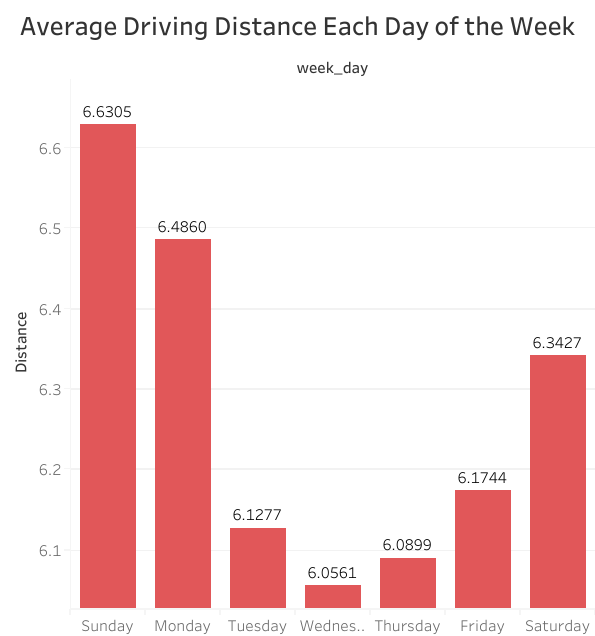

### **5\. What was the growth percentage of rides month over month?**

In [7]:
SELECT
MONTH(call_time) AS month,
COUNT(id),
LAG(COUNT(id)) OVER (ORDER BY MONTH(call_time)),
100 * (COUNT(id) - LAG(COUNT(id)) OVER (ORDER BY MONTH(call_time))) / LAG(COUNT(id)) OVER (ORDER BY MONTH(call_time)) AS growth_in_percentage
FROM
dbo.trip
GROUP BY MONTH(call_time)

(5 rows affected)

Total execution time: 00:00:00.202

month,(No column name),(No column name),growth_in_percentage
5,439732,NULL,NULL
6,479822,439732,9
7,479476,479822,0
8,515401,479476,7
9,403926,515401,-21


So we found out that it was 9% growth in June, no growth in July, 7% growth in August and  than we see a 21% drop in number of trips in September.

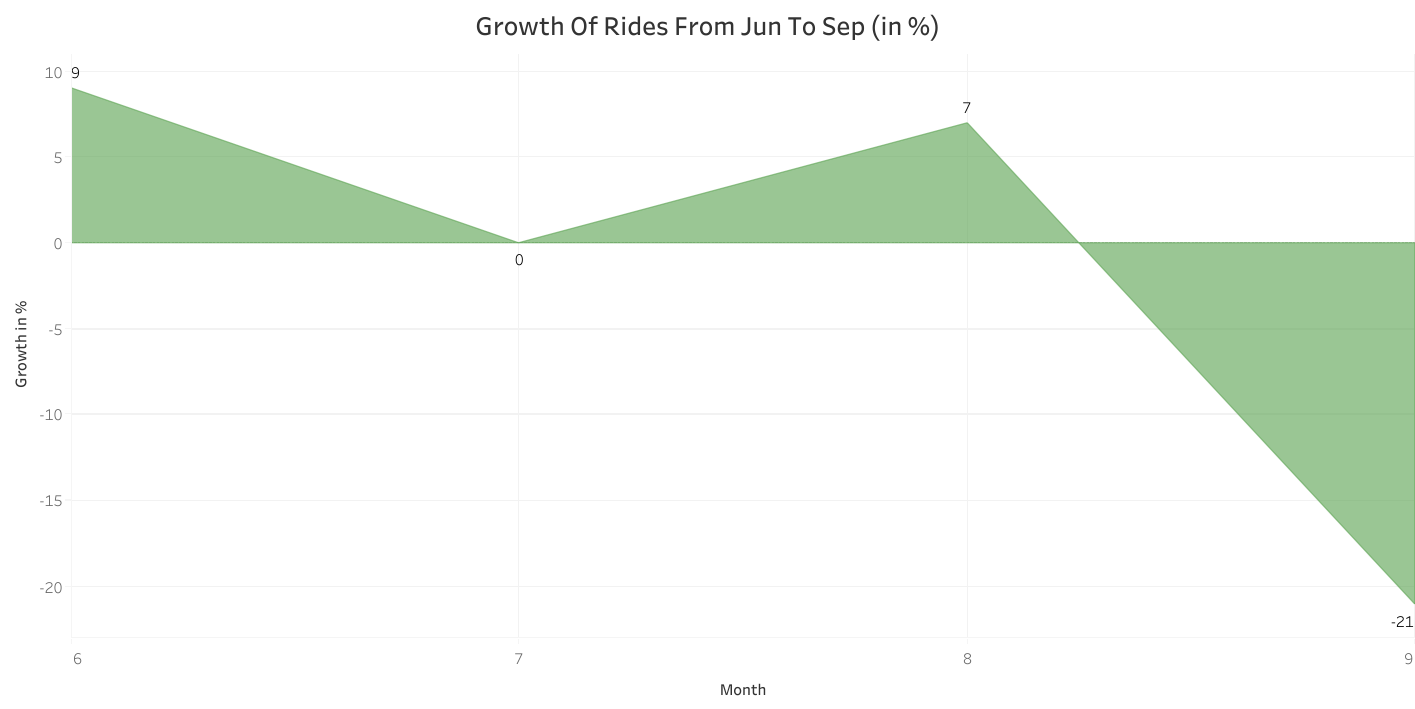

### **6.  List top 5 drivers per number of trips in every city.**

In [7]:
WITH new_tab AS (
  SELECT
COUNT(trip.id) AS number_of_trip,
trip.driver_id AS driver_id,
city.name,
ROW_NUMBER() OVER (PARTITION BY city.name ORDER BY COUNT(trip.id) DESC) AS driver_rank
FROM 
dbo.trip
INNER JOIN dbo.city
ON
dbo.trip.city_id = dbo.city.id
GROUP BY driver_id, city.name
)
SELECT *
FROM new_tab
WHERE
driver_rank >= 1 AND driver_rank <= 5

(30 rows affected)

Total execution time: 00:00:00.392

number_of_trip,driver_id,name,driver_rank
190,09a8b969,Gondor,1
178,a45b3264,Gondor,2
171,f147e8cf,Gondor,3
164,e6676e04,Gondor,4
148,3ed2dd01,Gondor,5
143,a947550b,Rivendell,1
142,c5d1405e,Rivendell,2
138,5cfeb4fa,Rivendell,3
130,aeafa773,Rivendell,4
129,df233c3c,Rivendell,5


From table above we can see, that not all city were appeared in our search (city like Mordor, Erebor, Moria and Minas Ithis).  Lets run additional query and check if those cities exist in the _trip_ table.

In [1]:
SELECT *
FROM 
dbo.trip
WHERE
city_id = 42868 OR city_id = 42948 OR city_id = 43094 OR city_id = 43244

(0 rows affected)

Total execution time: 00:00:00.242

id,driver_id,passenger_id,city_id,call_time,finish_time,surge_rate,trip_distance,trip_fare


We found out that people from cities: Mordor, Erebor, Moria and Minas Ithis don't use cab service at all.

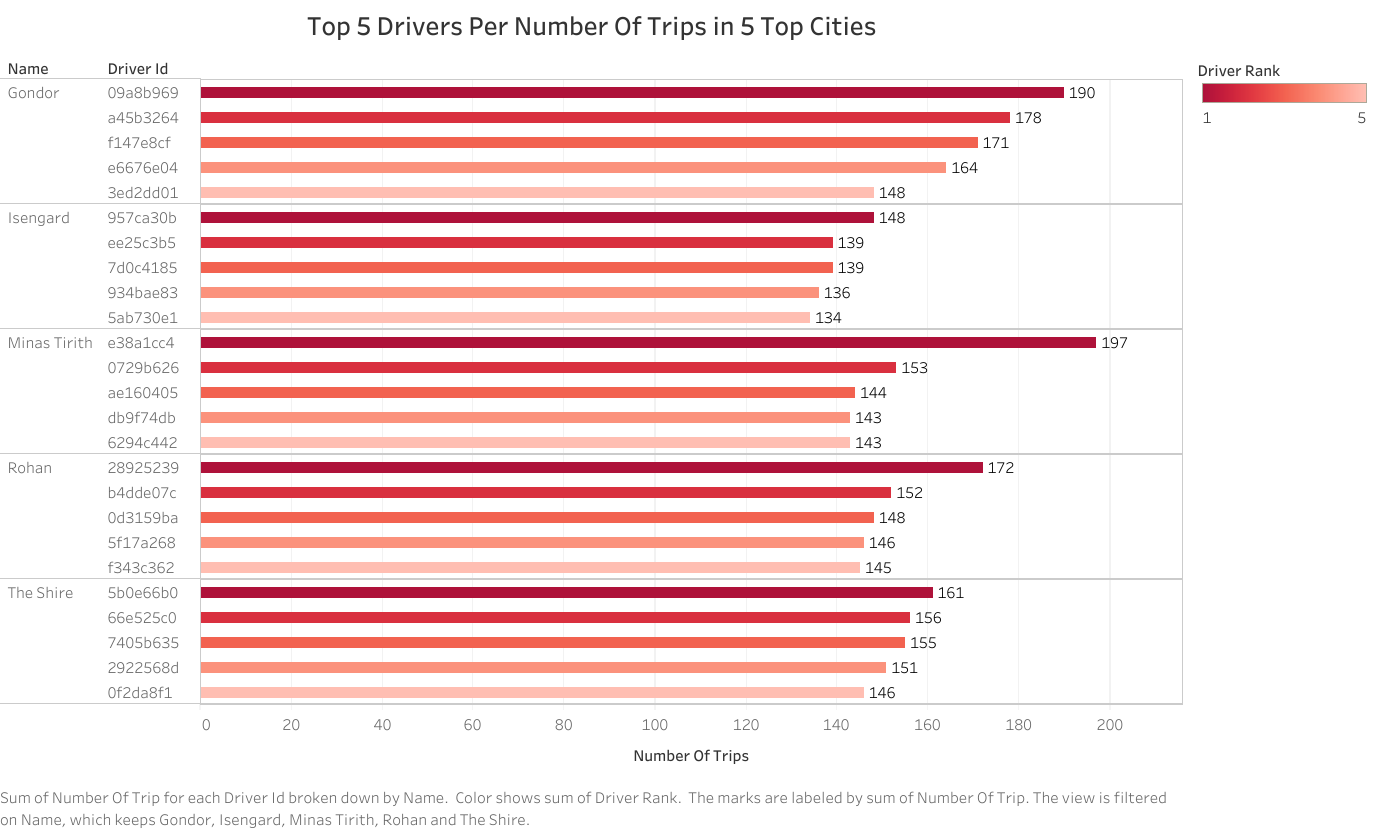

Before start an analytical part of this analysis we will look closer into each table.

**Table "passenger"**

In [ ]:
SELECT
id,
first_call_time
FROM
dbo.passenger
WHERE
YEAR(first_call_time) > 2019
ORDER BY first_call_time DESC

In [5]:
SELECT *
FROM
dbo.passenger
WHERE
YEAR(first_call_time) <= 2019 and YEAR(first_call_time) >= 2000
ORDER BY first_call_time 

(1195944 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:10.916

id,first_call_time
d113cd0a,2017-07-17 21:42:21.0000000
bb5944a1,2017-07-23 19:05:45.0000000
92f0ecbd,2017-07-24 08:21:36.0000000
91c9129e,2017-07-26 06:27:20.0000000
6b1403de,2017-07-27 23:01:12.0000000
24fa88ad,2017-07-28 03:58:28.0000000
fa0bb05b,2017-07-28 04:50:44.0000000
3ff9d376,2017-07-28 05:09:51.0000000
b9990bb2,2017-07-28 19:47:26.0000000
6dcb8a67,2017-07-30 08:00:07.0000000


There are total 1 235 782 passenger id. 

After sorting _first\_call\_time_ in descending order and then filtering data we found out there are 13 344 records after year 2019 and 13 172 records in the year 1970, so we can say those records are compromised.  The "legit" data in _passenger_ table starts on July, 17 2017 at 21:42:21 and ends September, 23 2019 at 23:45:06.

**Table "Calendar"**

In [4]:
SELECT 
COUNT(holiday) AS non_holiday
FROM
dbo.Calendar
WHERE
holiday = 0

SELECT 
COUNT(holiday) AS holiday
FROM
dbo.Calendar
WHERE
holiday = 1

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.009

non_holiday
1061


holiday
35


Data in the table _Calendar_ starts on January 1,  2018 and ends on December 31, 2020 (there ar total 1096 rows).  There are 35 holidays and 1061 non-holiday days during 3 years period between 2018-2020.

**Table "trip"**

In [1]:
SELECT
AVG(DATEDIFF(MINUTE, call_time, finish_time)) AS diff,
MAX(DATEDIFF(MINUTE, call_time, finish_time)) AS max,
MIN(DATEDIFF(MINUTE, call_time, finish_time)) AS min
FROM dbo.trip



(1 row affected)

Total execution time: 00:00:00.372

diff,max,min
20,2451,0


In [3]:
SELECT
COUNT(DISTINCT driver_id) AS drivers,
COUNT(DISTINCT passenger_id) AS passenger
FROM dbo.trip

(1 row affected)

Total execution time: 00:00:00.461

drivers,passenger
145611,1195765


In [6]:
SELECT
AVG(trip_distance) AS avg_distance,
MAX(trip_distance) AS max_distance,
MIN(trip_distance) AS min_distance
FROM
dbo.trip
WHERE
trip_distance > 0

(1 row affected)

Total execution time: 00:00:00.320

avg_distance,max_distance,min_distance
6.33084143366453,296.1000061035156,0.009999999776482582


In [7]:
SELECT
ROUND(SUM(trip_fare), 2)
FROM
dbo.trip

(1 row affected)

Total execution time: 00:00:00.087

(No column name)
12173281.31


Data in the table  _trip_ starts on May 1 and ends on September 23,  2019. There are total 2 318 357rides provided during this period. The average period between call time and finish time is 20 minutes , the minimum - 0 min and the maximum - 2451 min. There are total 145 611 drivers working in this business,  and 1 195 765 unique customers, who at least once ordered the ride.  The average  trip distance is  6.33 and max trip distance: 296.1. Total money earned in fares:   $12 173 281.31.

But also there is compromised  data in this table: 15257 rows have a negative number in _trip\_distance_ variable.

**Table "city"**

As we found out earlier in technical part, there are 10 cities in this table, but only in 6 of them do passengers really use ride service.

## **PART 2.   Analytical**

Now, to help a new Operations Manager create a little presentation for the weekly Ops manager, let's summarize some data and find answers to the following questions:  What is the total number of trips made between September 15 and September 22 (week before meeting) and how does it compare to the previous week? How many new customers have used the service in this period and how does it compare to the previous week? Find the average fare and the total money earned in fares. How many drivers worked last week? Who is our most active customers? How trips and fares are distributed by the cities and day of the week? 

The queries for the slides presentation are following

In [2]:
SELECT                  --the number of new customers 
COUNT(p.id)
FROM dbo.passenger p
INNER JOIN dbo.trip t
ON
p.first_call_time = t.call_time
WHERE
p.first_call_time BETWEEN '2019-09-15' AND '2019-09-22'

SELECT                  --average trip_fare and sum of fares during Sep. 15-22
ROUND(AVG(trip_fare), 2),
ROUND(SUM(trip_fare), 2)
FROM
dbo.trip
WHERE
call_time BETWEEN '2019-09-15' AND '2019-09-22'

SELECT                  --how the number of trips and fares were distributedamong the cities
round(SUM(trip.trip_fare), 4) AS total_fare,
COUNT(trip.id) AS total_trips,
city.name
FROM dbo.trip
LEFT JOIN dbo.city
ON city.id = trip.city_id
WHERE
call_time BETWEEN '2019-09-15' AND '2019-09-22'
GROUP BY city.name
ORDER BY total_trips DESC

SELECT                  -- find the number of trips, and trip_fare by every day of the week
COUNT(trip.id) AS trips,               
round(SUM(trip.trip_fare), 2) AS fare,
Calendar.week_day
FROM dbo.trip
LEFT JOIN dbo.Calendar
ON CAST(dbo.trip.call_time AS date) = dbo.Calendar.calendar_date
WHERE
call_time BETWEEN '2019-09-15' AND '2019-09-22'
GROUP BY Calendar.week_day
ORDER BY
CASE
WHEN week_day = 'Sunday' THEN 1
WHEN week_day = 'Monday' THEN 2
WHEN week_day = 'Tuesday' THEN 3
WHEN week_day = 'Wednesday' THEN 4
WHEN week_day = 'Thursday' THEN 5
WHEN week_day = 'Friday' THEN 6
WHEN week_day = 'Saturday' THEN 7
END ASC

SELECT                  --number of drivers worked this week
COUNT(DISTINCT driver_id)
FROM
dbo.trip
WHERE
call_time BETWEEN '2019-09-15' AND '2019-09-22'

SELECT                  -- passenger with the number of trips higher or equal 5 in this week
passenger_id AS passenger_id,
COUNT(id) number_of_trips
FROM dbo.trip
WHERE
call_time BETWEEN '2019-09-15' AND '2019-09-22'
GROUP BY passenger_id
HAVING
COUNT(id) >= 5
ORDER BY number_of_trips DESC

(1 row affected)

(1 row affected)

(6 rows affected)

(7 rows affected)

(1 row affected)

(18 rows affected)

Total execution time: 00:00:00.692

(No column name)
3285


(No column name),(No column name)
4.95,600154.33


total_fare,total_trips,name
121310.13,24309,The Shire
108205.31,22511,Minas Tirith
109320.37,20897,Rivendell
93000.44,18921,Rohan
87732.87,17339,Isengard
80585.21,17223,Gondor


trips,fare,week_day
19521,103994.08,Sunday
16289,86386.27,Monday
15517,73878.32,Tuesday
16230,77168.59,Wednesday
16649,80011.04,Thursday
17355,82405.56,Friday
19639,96310.47,Saturday


(No column name)
53091


passenger_id,number_of_trips
c44eaa8d,7
15704780,6
1988e284,5
26e8ee19,5
c4fe296c,5
64f29241,5
eafadf3e,5
4870a8ca,5
5f4d6f1b,5
8025d16f,5


Here is the slides for the weekly meeting.

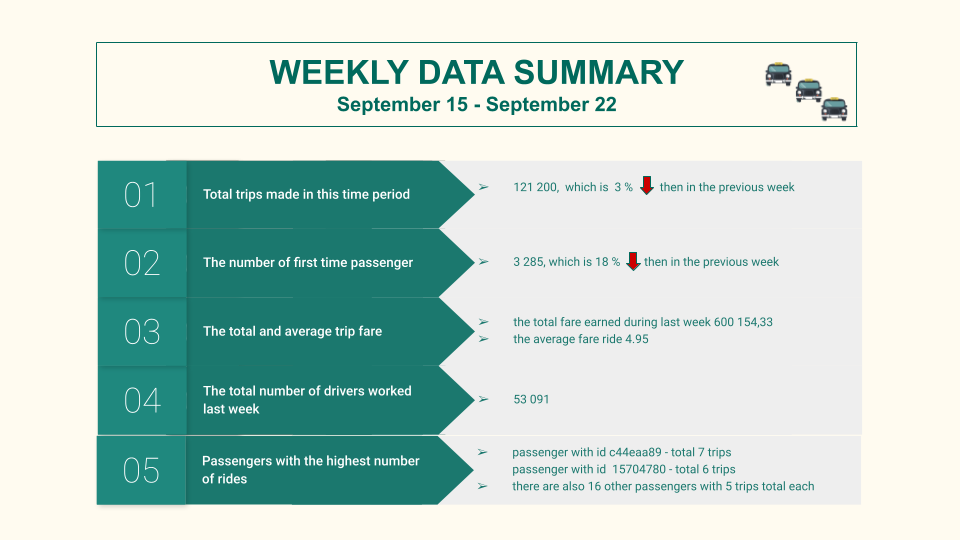

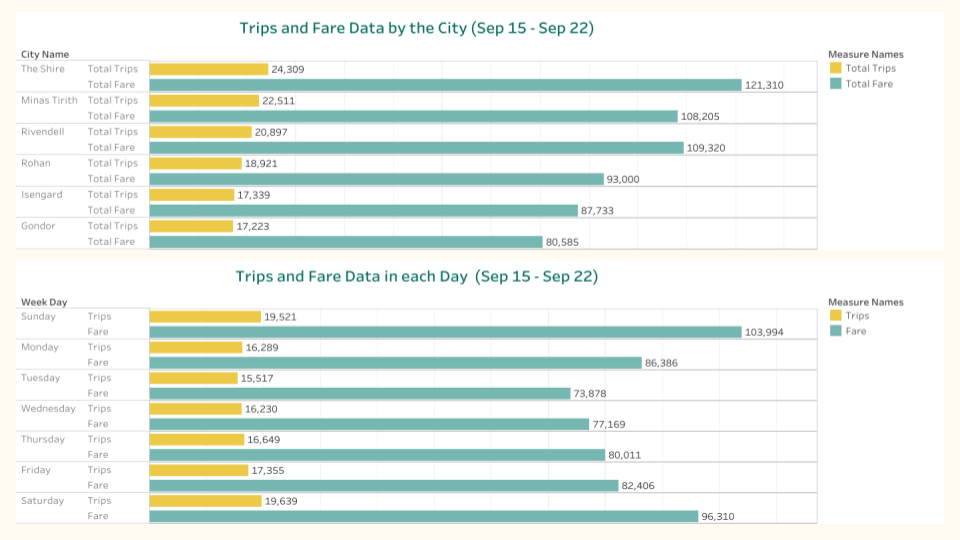

Now, let's try to find the answer on how to spend promotion budget: on passenger or on driver side of the business? As a key metrics I would consider the growth of the number of the unique passengers (who use the service ones), and the number of drivers for the period from May to September and then we compare it to the growth of rides in the same period.  Let's run a queries to find the growth trends for distinct/unique passengers and drivers. 

As we look closer at the query results, we can see that fluctuationsin percentage growth in passengers strongly correlated with the rides. Of course, to find out why these graphs correlate we need a deeper analysis. In which we can explore data separately by city, dates, times and distances. Based on these findings we can plan the driver's schedule and surge rate .  In addition we can study the behavior and habits of "regular" passengers (those who has 5, 10 or more rides) to keep them coming back.

In [11]:
SELECT                      --growth of passengers
MONTH(call_time) AS month,
LAG(COUNT(DISTINCT passenger_id)) OVER (ORDER BY MONTH(call_time)) AS unique_passenger_previous_month,
100 * (COUNT(DISTINCT passenger_id) - LAG(COUNT(DISTINCT passenger_id)) OVER (ORDER BY MONTH(call_time))) / LAG(COUNT(DISTINCT passenger_id)) OVER (ORDER BY MONTH(call_time)) AS growth
FROM
dbo.trip
GROUP BY MONTH(call_time)

(5 rows affected)

Total execution time: 00:00:00.364

month,unique_passenger_previous_month,growth
5,NULL,NULL
6,338449,8
7,367164,0
8,369710,5
9,389758,-17


In [4]:
SELECT                  -- growth of drivers month by month
MONTH(call_time) AS month,
LAG(COUNT(DISTINCT driver_id)) OVER (ORDER BY MONTH(call_time)) AS driver_previous_month,
100 * (COUNT(DISTINCT driver_id) - LAG(COUNT(DISTINCT driver_id)) OVER (ORDER BY MONTH(call_time))) / LAG(COUNT(DISTINCT driver_id)) OVER (ORDER BY MONTH(call_time)) AS driver_growth
FROM
dbo.trip
GROUP BY MONTH(call_time)

(5 rows affected)

Total execution time: 00:00:00.378

month,driver_previous_month,driver_growth
5,NULL,NULL
6,85031,2
7,87212,1
8,88839,5
9,93311,-8


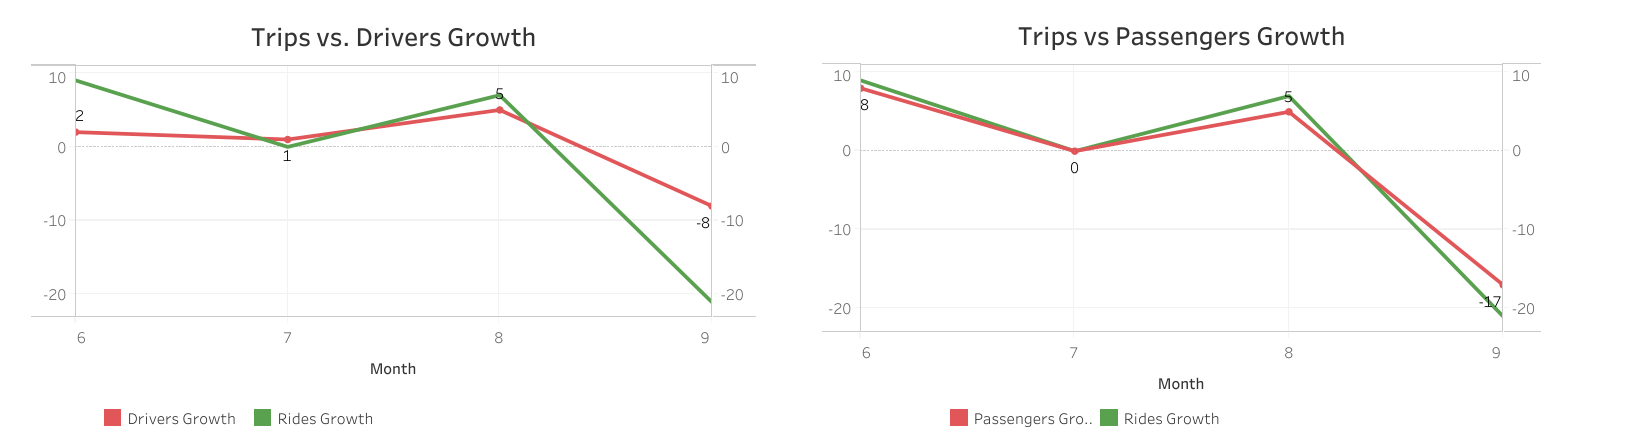

Therefore, based on above I would invest money into the passenger side of the business.

In this part I will run a few more queries to discover more interesting insights about "99 Little Orange" business.

In [8]:
SELECT                  --distribution of trips, distances and fares by each city
round(SUM(trip.trip_fare), 4) AS total_fare,
round(SUM(trip.trip_distance), 4) AS total_distance,
COUNT(trip.id) total_trips,
city.name
FROM dbo.trip
LEFT JOIN dbo.city
ON city.id = trip.city_id
GROUP BY city.name
ORDER BY total_trips DESC

Warning: Null value is eliminated by an aggregate or other SET operation.

(6 rows affected)

Total execution time: 00:00:00.245

total_fare,total_distance,total_trips,name
2446599.7202,2722886.4803,489454,The Shire
2083601.9599,2704027.2505,418895,Minas Tirith
2203367.3804,2644627.9903,388464,Rivendell
1928866.1103,2211139.9603,365397,Rohan
1875009.9703,2560532.0502,337648,Isengard
1635836.1703,1586824.1901,318499,Gondor


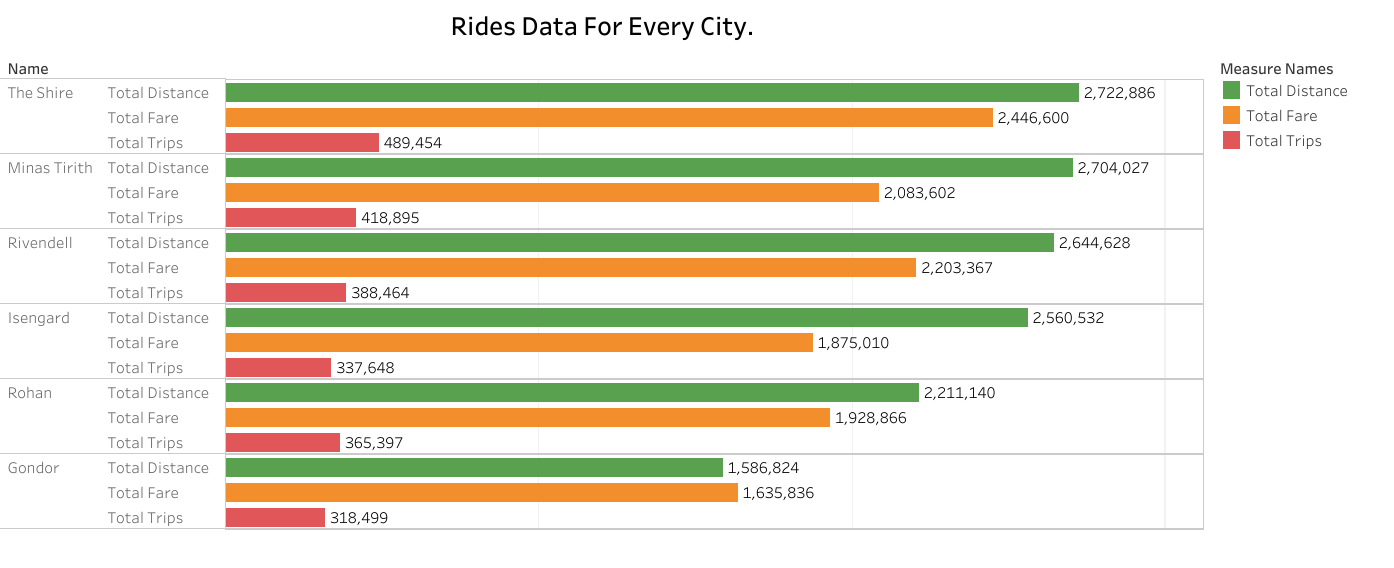

In [9]:
SELECT                  -- the number of trips, drivers and passengers for every week day 
COUNT(trip.id) AS trips,               
COUNT (DISTINCT trip.driver_id) AS driver,
COUNT (DISTINCT trip.passenger_id) AS passenger,
Calendar.week_day
FROM dbo.trip
LEFT JOIN dbo.Calendar
ON CAST(dbo.trip.call_time AS date) = dbo.Calendar.calendar_date
GROUP BY Calendar.week_day
ORDER BY trips

(7 rows affected)

Total execution time: 00:00:00.938

trips,driver,passenger,week_day
287873,90548,244612,Tuesday
300167,92985,253114,Wednesday
312550,94959,263751,Thursday
315033,90662,271298,Monday
335609,98438,281097,Friday
381571,95486,321768,Sunday
385554,102086,321971,Saturday


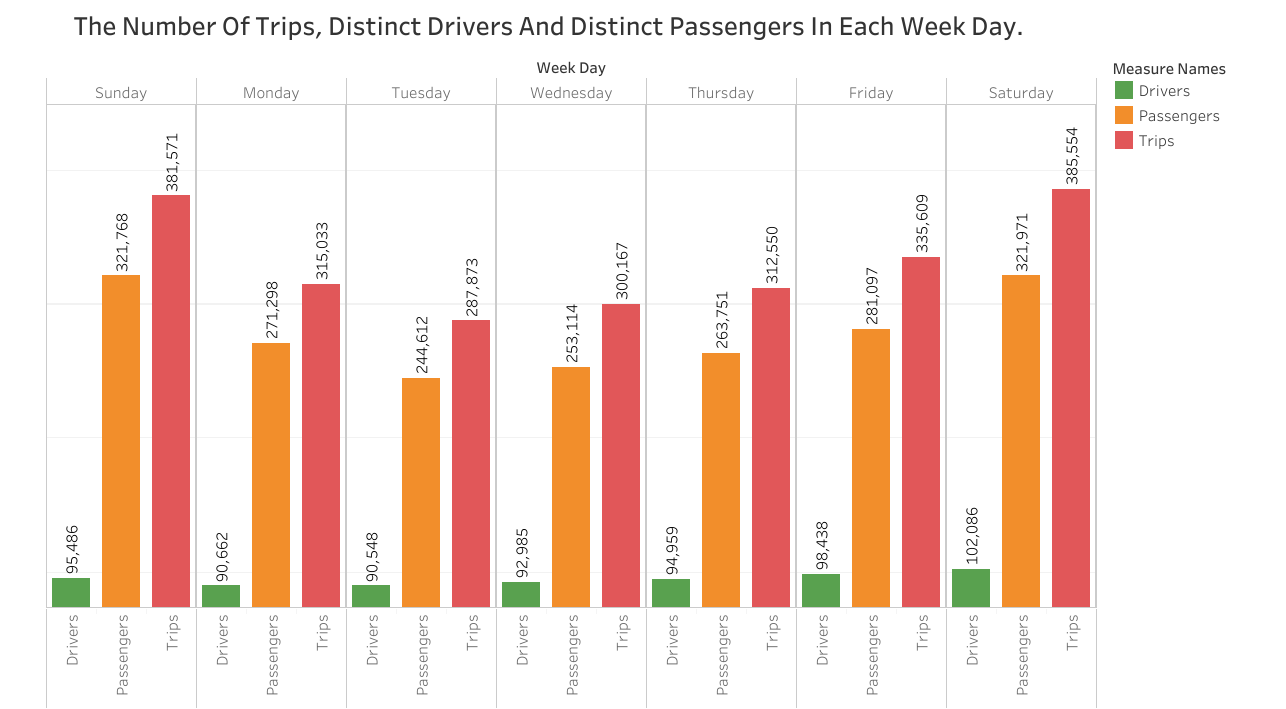

In [1]:
SELECT * FROM -- trips distribution by the day of the week and time of the day
(
  SELECT      
  trip.id,
  DATEPART(HOUR, trip.call_time) AS hours,
  Calendar.week_day
  FROM dbo.trip
  LEFT JOIN dbo.Calendar
  ON CAST(dbo.trip.call_time AS date) = dbo.Calendar.calendar_date
) temp
PIVOT(
  COUNT(id)   
  FOR hours IN (
    [0],
    [1],
    [2],
    [3],
    [4],
    [5],
    [6],
    [7],
    [8],
    [9],
    [10],
    [11],
    [12],
    [13],
    [14],
    [15],
    [16],
    [17],
    [18],
    [19],
    [20],
    [21],
    [22],
    [23])
) AS pivot_table
ORDER BY
CASE
WHEN week_day = 'Sunday' THEN 1
WHEN week_day = 'Monday' THEN 2
WHEN week_day = 'Tuesday' THEN 3
WHEN week_day = 'Wednesday' THEN 4
WHEN week_day = 'Thursday' THEN 5
WHEN week_day = 'Friday' THEN 6
WHEN week_day = 'Saturday' THEN 7
END ASC

Warning: Null value is eliminated by an aggregate or other SET operation.

(7 rows affected)

Total execution time: 00:00:00.420

week_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Sunday,21179,21322,22178,22759,23980,26710,27368,25582,23154,20959,17098,12506,8934,7007,5816,5084,4734,5694,7678,10142,12308,14497,17042,17840
Monday,17209,17042,17757,18790,20637,22027,20367,18107,15939,12371,8562,5114,2930,1765,1195,1353,3277,9056,16052,17419,16701,15997,16892,18474
Tuesday,19407,18656,18392,18516,19501,19601,17422,13476,11652,8977,5324,2930,1485,967,643,835,2477,8114,15579,17359,16474,15531,16231,18324
Wednesday,20280,18817,18423,19088,20459,20866,19253,14659,12751,9804,6032,3490,1778,1047,720,902,2391,8198,15681,17363,16705,15860,16847,18753
Thursday,20279,19419,19062,19631,20914,21903,20675,15965,14423,10968,7280,4474,2460,1511,1184,1200,2603,8150,15650,17105,16566,15615,16451,19062
Friday,20852,19731,19419,20259,22389,22839,22026,17239,15163,11958,8083,5030,3070,1924,1328,1389,2961,9062,17086,18969,18254,17429,18222,20927
Saturday,22424,21433,21973,23216,24719,25708,26796,23208,20705,18155,13581,9593,6912,5362,4388,3813,4364,7153,12536,15715,17011,17772,18741,20276


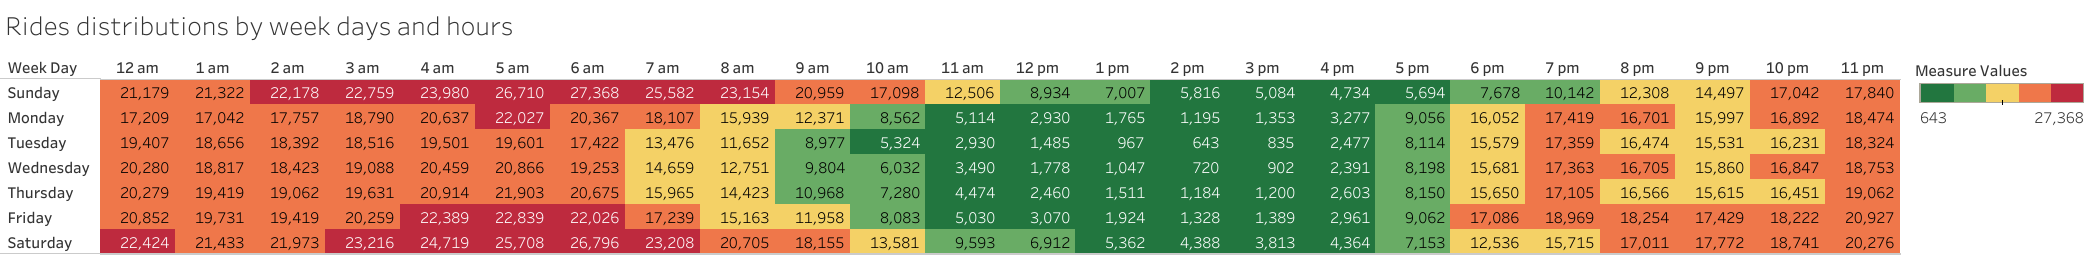

As we can see from the results above the ride service is most in demand in evening (starting around 9p.m) and overnight hours with the peak in between 5 - 7 am. And most busiest days are Sunday and Saturday.

In [10]:
SELECT  -- the number of the new passengers called and made a trip between May 1 and September 23 2019
COUNT(p.id)
FROM
dbo.passenger p
INNER JOIN dbo.trip t
ON p.first_call_time = t.call_time

(1 row affected)

Total execution time: 00:00:00.210

(No column name)
116756


###  **Thanks for checking out my project!**